<a href="https://colab.research.google.com/github/sftSalman/tensorflowBasic/blob/main/Human_horse_ImageGenerator_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-07-28 03:55:25--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  65.1MB/s    in 2.2s    

2022-07-28 03:55:27 (65.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-07-28 03:55:27--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (

In [2]:
import zipfile


In [3]:
local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/horse-human')

In [4]:
local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/validation-horse-human')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
import os 

In [7]:
train_horse = os.path.join('/content/horse-human/horses')
train_human = os.path.join('/content/horse-human/humans')


In [8]:
valid_horse = os.path.join('/content/validation-horse-human/horses')
valid_human = os.path.join('/content/validation-horse-human/humans')

In [9]:
train_horse_names = os.listdir(train_horse)
train_human_names = os.listdir(train_human)
#print(train_horse_names[1].shape)

valid_horse_names = os.listdir(valid_horse)
valid_horse_names = os.listdir(valid_human)

In [10]:

print(len(os.listdir(train_horse)))
print(len(os.listdir(train_human)))

print(len(os.listdir(valid_horse)))
print(len(os.listdir(valid_human)))

500
527
128
128


(300, 300, 4)


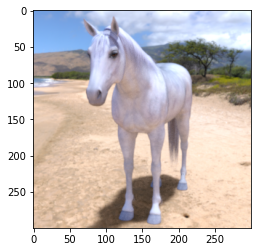

In [11]:
img = mpimg.imread('/content/horse-human/horses/horse01-0.png')
plt.imshow(img)
print(img.shape)

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

(300, 300, 4)
(300, 300, 4)


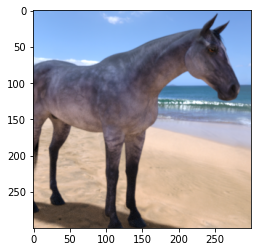

(300, 300, 4)


In [13]:
#fig = plt.gcf()
#fig.set_size_inches(ncols * 4, nrows * 4)

#pic_index += 8
next_horse_pix = [os.path.join(train_horse, fname) 
                for fname in train_horse_names[1:3]]
next_human_pix = [os.path.join(train_human, fname) 
                for fname in train_human_names[1:3]]

for i, img_path in enumerate(next_horse_pix):
  # Set up subplot; subplot indices start at 1
  #sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  print(img.shape)

plt.show()
print(img.shape)

In [14]:
import tensorflow as tf 

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape =(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape =(300,300,3)),
                                    
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape =(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape =(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape =(300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                   # tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    
                                    ])
                                  

In [16]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
from tensorflow.keras.optimizers import RMSprop

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_dategen = ImageDataGenerator(1./255)

train_generator = train_datagen.flow_from_directory('/content/horse-human',
                                                    target_size = (300,300),
                                                    batch_size = 128,
                                                    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


In [21]:


validation_generator = validation_dategen.flow_from_directory('/content/validation-horse-human',
                                                    target_size = (300,300),
                                                    batch_size = 128,
                                                    class_mode = 'binary')

Found 256 images belonging to 2 classes.


In [22]:
history = model.fit(train_generator,
                    steps_per_epoch=2,
                    epochs =5,
                    verbose =2,
                    validation_data = validation_generator,
                    validation_steps=8)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2/2 - 20s - loss: 1.2164 - accuracy: 0.5352 - val_loss: 1260.7008 - val_accuracy: 0.5000 - 20s/epoch - 10s/step
Epoch 2/5
2/2 - 1s - loss: 3.5697 - accuracy: 0.5115 - 1s/epoch - 747ms/step
Epoch 3/5
2/2 - 2s - loss: 0.6893 - accuracy: 0.5430 - 2s/epoch - 1s/step
Epoch 4/5
2/2 - 1s - loss: 0.6901 - accuracy: 0.4351 - 1s/epoch - 556ms/step
Epoch 5/5
2/2 - 2s - loss: 0.6892 - accuracy: 0.5039 - 2s/epoch - 1s/step


In [29]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image

In [27]:
uploaded = files.upload()
path =  '/content/' + fn
img = image.load_img(path,target_size=(300,300))
x = image_to_array(img)
x/=255
x = np.expand_dims(x,axis=0)
classes = model.predict(images,batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(fn + " is a human")
else:
    print(fn + " is a horse")


Saving human07-01.png to human07-01.png


NameError: ignored

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving human07-01.png to human07-01 (4).png
[0.52759224]
human07-01.png is a human


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


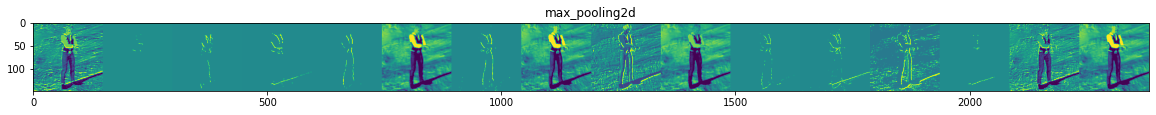

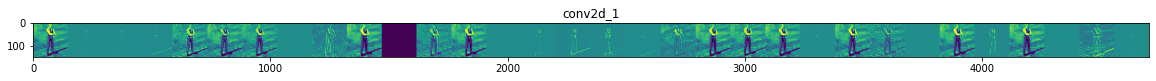

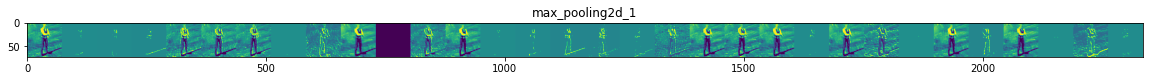

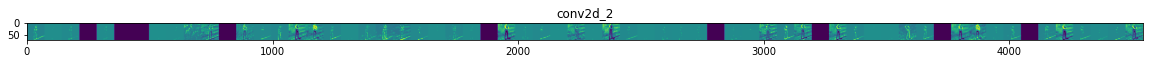

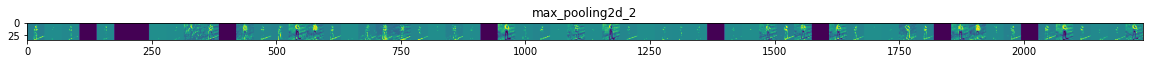

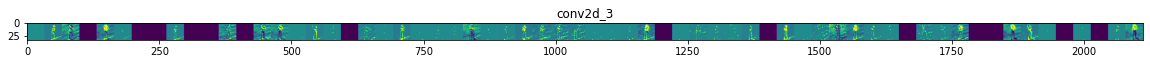

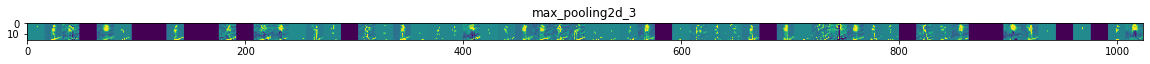

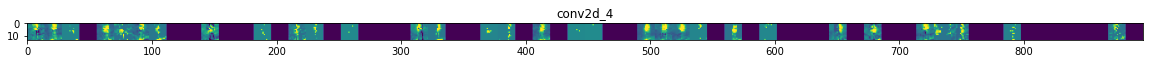

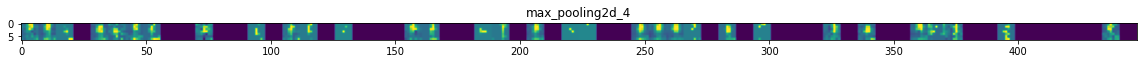

In [36]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')